# 1. Import images

In [1]:
import scipy.io
data = scipy.io.loadmat('data/ex3data1.mat')

# A 5000x400matrix, each row representing a 20x20 pixel image
X = data['X']

# A 5000-dimensional matrix, each element representing the number shown in the corresponding image
Y = data['y']

# 2. Display selection of images

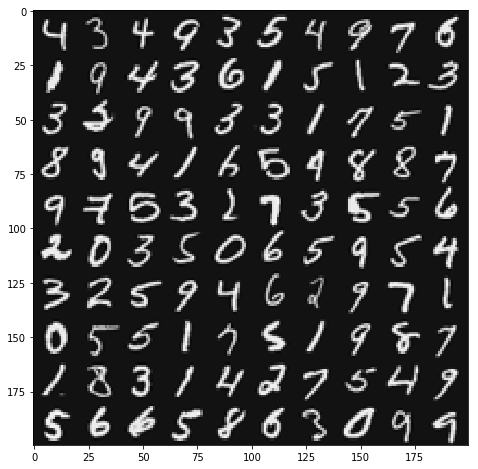

In [2]:
import numpy as np
import random
from matplotlib import pyplot as plt

img_arr = np.empty([20, 220])
for j in range(0, 10):
    img_row = np.empty([20, 20])
    for i in range(0, 10):
        img = X[random.randint(1, 5000)].reshape(20, 20)
        img_row = np.concatenate((img_row, img), axis=1)
    img_arr = np.concatenate((img_arr, img_row), axis=0)

plt.figure(figsize=(12,8))
plt.imshow(img_arr[20:, 20: ].T, interpolation="nearest", cmap='gray')

# Show random selection of 100 images using imshow
plt.show()

# 3. Vectorizing the Cost function

In [3]:
from scipy.special import expit

def h(theta, vec):
    return expit(np.dot(vec, theta.T))

def cost_function(theta, X, Y):
    first_term = -(np.log(h(theta, X)) * Y.T)
    second_term = -(np.log(1.0-h(theta, X)) * (1.0-Y.T))
    return float(np.sum(first_term + second_term)/Y.shape[0])

# 4. Vectorized Gradient Descent

In [4]:
X = np.append(np.ones((X.shape[0], 1)), X, axis=1)

def gradient(theta, X, Y):
    first_term = h(theta, X) - Y.reshape(5000)
    second_term = X.T
    gradient = np.array(np.dot(second_term, first_term))/Y.shape[0]
    return gradient

# 5. Regularization

## 5.1 Regularizing the Cost function

In [5]:
def regularized_cost_function(theta, X, Y):
    regular_cost = cost_function(theta, X, Y)
    lambda_ = 0.
    cost = regular_cost + (lambda_/(2.0*Y.shape[0]))*np.sum(theta[1:] * theta[1:])
    return cost

## 5.2 Regularizing the Gradient

In [6]:
def regularized_gradient(theta, X, Y):
    regular_gradient = gradient(theta, X, Y)
    lambda_ = 0.
    regularization_vec = np.copy(regular_gradient)
    regularization_vec[1:] = regularization_vec[1:] + ((lambda_/Y.shape[0])*theta[1:])
    return regularization_vec.reshape(401)

# 6. One-vs-All Classification using Logistic Regression

## 6.1 Obtain  Θ (big theta)

In [7]:
import scipy.optimize as opt

def get_theta():
    big_theta = np.zeros((10, 401))
    for i in range(0, 10):
        classifier_y = np.zeros(5000)
        print "Optimizing theta for", i, "..."
        for j in range(0, 5000):
            if (i >= 1 and Y[j] == i):
                classifier_y[j] = 1
            elif (i == 0 and Y[j] == 10):
                classifier_y[j] = 1

        classifier_y = np.array([classifier_y]).T
        big_theta[i] = opt.fmin_cg(regularized_cost_function,
                                   x0=np.array([big_theta[i]]),
                                   fprime=regularized_gradient,
                                   maxiter=100,
                                   disp=False,
                                   args=(X, classifier_y))
    print "Done!"
    return big_theta

theta = get_theta()

Optimizing theta for 0 ...
Optimizing theta for 1 ...
Optimizing theta for 2 ...
Optimizing theta for 3 ...
Optimizing theta for 4 ...
Optimizing theta for 5 ...
Optimizing theta for 6 ...
Optimizing theta for 7 ...
Optimizing theta for 8 ...
Optimizing theta for 9 ...
Done!


## 6.2 Prediction

In [8]:
def predict_one_vs_all(theta, X):
    correct_hypotheses = 0
    for i in range(0, X.shape[0]):
        hypothesis = np.zeros(10)
        for j in range(0, 10):
            hypothesis[j] = h(theta[j], X[i])

        max_hypothesis_val = np.argmax(hypothesis)
        if (max_hypothesis_val >=1 and max_hypothesis_val == Y[i]):
            correct_hypotheses = correct_hypotheses + 1
        elif (max_hypothesis_val == 0 and  Y[i] == 10):
            correct_hypotheses = correct_hypotheses + 1

    print 'Accuracy of One vs. All classifier trained via logisitic regression: \
    %0.2f%% \n(Actual value depends on iterations on optimization function) \n\
    ' % (float(correct_hypotheses) * 100.0 / 5000.0)

predict_one_vs_all(theta, X)

Accuracy of One vs. All classifier trained via logisitic regression:     91.34% 
(Actual value depends on iterations on optimization function) 
    


# 7. Neural Networks

In [42]:
data_nn = scipy.io.loadmat('data/ex3weights.mat')
theta1 = data_nn['Theta1']
theta2 = data_nn['Theta2']

## 7.1 Prediction function

In [41]:
def prediction(hypothesis, i, Y):
    prediction = np.argmax(hypothesis) + 1
    if (prediction == Y[i]):
        return True
    else:
        return False

## 7.2 Feed Forward Propogation

In [40]:
def feed_forward_propogation(X, Y):
    correct_hypotheses = 0
    for i in range(0, X.shape[0]):
        # First layer
        z2 = np.dot(theta1, X[i].T)
        a2 = expit(z2)
        # Add bias nodes
        a2 = np.concatenate((np.ones(1), a2), axis=0)

        # Second layer
        z3 = np.dot(theta2, a2.T)
        a3 = expit(z3)

        # Final layer (hypothesis)
        hypothesis = a3
        result = prediction(hypothesis, i, Y)
        if (result):
            correct_hypotheses = correct_hypotheses + 1

    print 'Accuracy of Neural Network: %0.2f%%' % (float(correct_hypotheses) * 100.0 / 5000.0)

feed_forward_propogation(X, Y)

Accuracy of Neural Network: 97.52%
